In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [43]:
num_samples = 400

# The desired mean values of the sample.
mu = np.array([0,0])

# The desired covariance matrix.
r = np.array([
        [  1, -.5],
        [-.8,1]])

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=num_samples)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  if sys.path[0] == '':


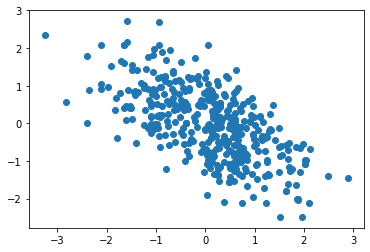

In [44]:
 plt.scatter(y[:,0], y[:,1])

In [32]:
np.corrcoef(y[:,0],y[:,1])

array([[1.        , 0.78964931],
       [0.78964931, 1.        ]])

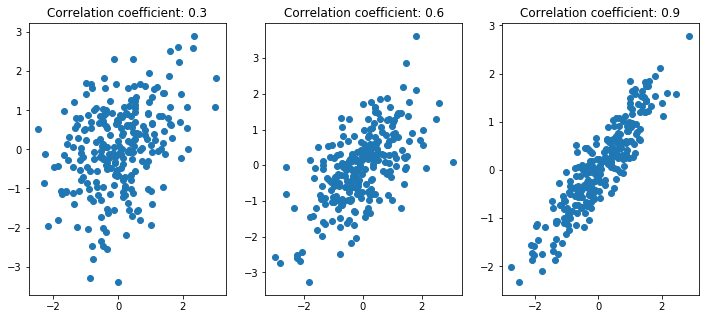

In [48]:
correlations = [.3,.6,.9]

fig, axes = plt.subplots(figsize=(12,5),nrows = 1, ncols=3)
for n in range(0,3):
    mu = np.array([0,0])
    r = np.array([[  1, correlations[n]],[correlations[n],1]])
    y = np.random.multivariate_normal(mu, r, size=250)
    ax = axes[n]
    ax.scatter(y[:,0], y[:,1])
    ax.set_title(f'Correlation coefficient: {correlations[n]}')

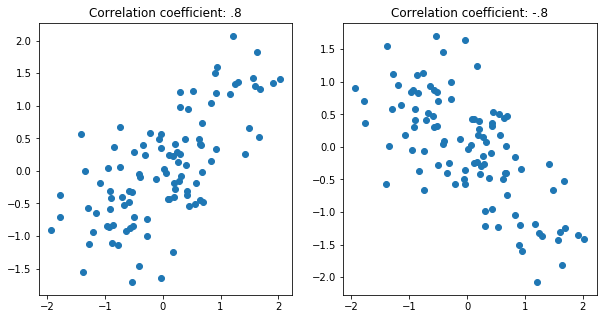

In [86]:
fig, axes = plt.subplots(figsize=(10,5),nrows = 1, ncols=2)
y = np.random.multivariate_normal(mu, np.array([[  1, .8],[.8,1]]), size=100)
#y_lim = (min(2*y[:,1])*1.05,max(2*y[:,1]*1.05))
coeffs = [1,-1]
labels = ['Correlation coefficient: .8','Correlation coefficient: -.8']

for n in range(0,2):
    ax = axes[n]
#    ax.set_ylim(y_lim)
    ax.scatter(y[:,0], coeffs[n]*y[:,1])
    ax.set_title(labels[n])


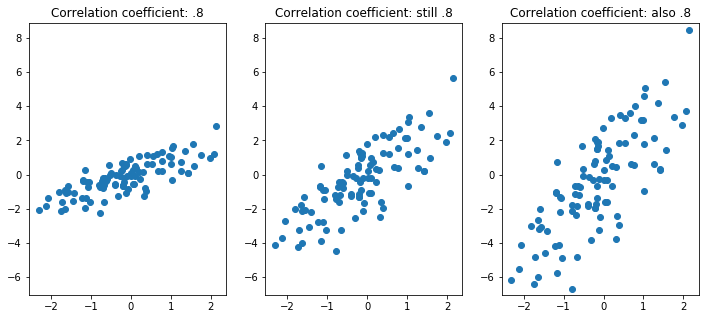

In [84]:
fig, axes = plt.subplots(figsize=(12,5),nrows = 1, ncols=3)
y = np.random.multivariate_normal(mu, np.array([[  1, .8],[.8,1]]), size=100)
y_lim = (min(3*y[:,1])*1.05,max(3*y[:,1]*1.05))
coeffs = [1,2,3]
labels = ['Correlation coefficient: .8','Correlation coefficient: still .8','Correlation coefficient: also .8']

for n in range(0,3):
    ax = axes[n]
    ax.set_ylim(y_lim)
    ax.scatter(y[:,0], coeffs[n]*y[:,1])
    ax.set_title(labels[n])

In [77]:
quad_x = np.linspace(-3,3,100)
noise = np.random.rand(100)*2
quad_y = [x**2-2 for x in quad_x]+noise

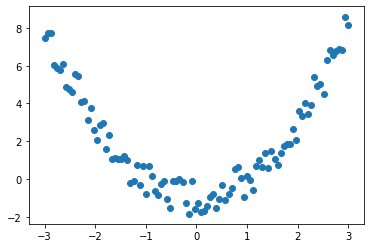

In [78]:
plt.scatter(quad_x,quad_y)

In [79]:
np.corrcoef(quad_x,quad_y)

array([[1.        , 0.02696852],
       [0.02696852, 1.        ]])

In [82]:
from scipy import spatial
spatial.distance.correlation(quad_x,quad_y)

0.9730314783262851

In [89]:
np.corrcoef(y[:,0], 4*y[:,1])

array([[1.        , 0.68131457],
       [0.68131457, 1.        ]])

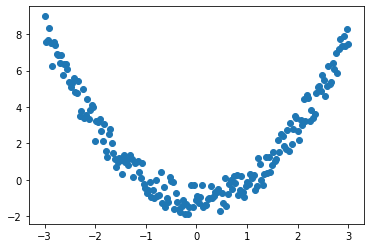

In [114]:
quad_x = np.linspace(-3,3,200)
noise = np.random.rand(200)*2
quad_y = [x**2-2 for x in quad_x]+noise
plt.scatter(quad_x,quad_y)

In [110]:
spatial.distance.correlation(quad_x,quad_y)

1.003077255295867

In [111]:
np.corrcoef(quad_x,quad_y)

array([[ 1.        , -0.00307726],
       [-0.00307726,  1.        ]])

In [112]:
from scipy.spatial.distance import pdist, squareform
def distcorr(X, Y):
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

In [115]:
distcorr(quad_x,quad_y)

0.48234420902389

In [153]:
roll_1 = np.random.randint(1,7,30)
roll_2 = np.random.randint(1,7,30)
roll_3 = np.random.randint(1,7,30)
roll_4 = np.random.randint(1,21,30)
roll_5 = np.random.randint(1,21,30)
roll_6 = np.random.randint(1,21,30)
roll_sum = roll_1+roll_2+roll_3+roll_4+roll_5

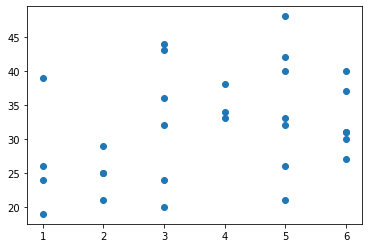

In [154]:
plt.scatter(roll_1,roll_sum)

In [155]:
np.corrcoef(roll_1,roll_sum)

array([[1.        , 0.33730325],
       [0.33730325, 1.        ]])

array([[1.        , 0.17454373],
       [0.17454373, 1.        ]])

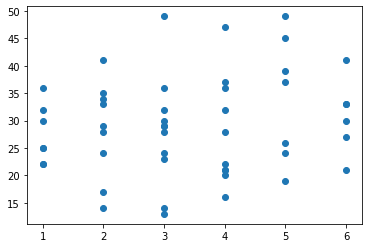

In [159]:
roll_1 = np.random.randint(1,7,50)
roll_2 = np.random.randint(1,7,50)
roll_3 = np.random.randint(1,7,50)
roll_4 = np.random.randint(1,21,50)
roll_5 = np.random.randint(1,21,50)
roll_6 = np.random.randint(1,21,50)
roll_sum = roll_1+roll_2+roll_3+roll_4+roll_5
plt.scatter(roll_1,roll_sum)
np.corrcoef(roll_1,roll_sum)

In [171]:
for n in range(1,7):
    corr = np.corrcoef(globals()[f'roll_{n}'],roll_sum)[0][1]
    print(f'roll {n}: {corr}')

roll 1: 0.1745437319488408
roll 2: 0.1419101649986081
roll 3: 0.46091354487330627
roll 4: 0.6452319040224074
roll 5: 0.6540554740866412
roll 6: 0.14074301634696262


In [168]:
np.corrcoef(roll_1,roll_2)[0][1]

-0.00877432651391054

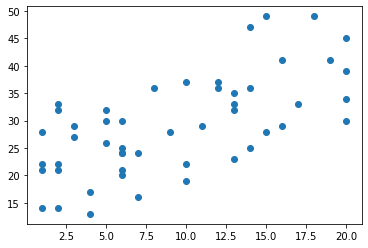

In [173]:
plt.scatter(roll_5,roll_sum)

Text(0, 0.5, "Ratio of heads - 'average value'")

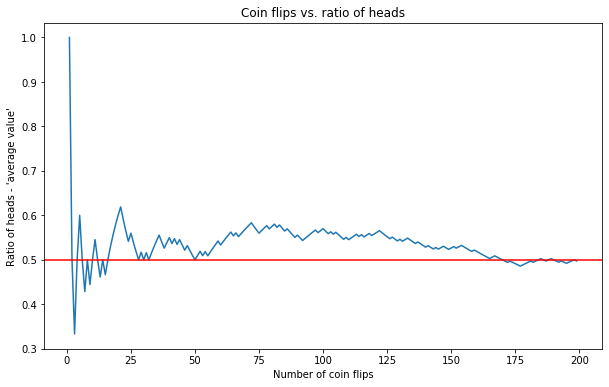

In [297]:
heads = 0
h_ratios = []

for n in range(1,200):
    heads += np.random.randint(0,2)
    h_ratios.append(heads/n)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,200),h_ratios)
plt.axhline(.5,c='r')
plt.title('Coin flips vs. ratio of heads')
plt.xlabel('Number of coin flips')
plt.ylabel("Ratio of heads - 'average value'")

In [383]:
def normal_distribution(mu,sigma,x_values):
    const = 1/(sigma*np.sqrt(2*np.pi))
    
    curve = [const*np.e**(-.5*((x-mu)/sigma)**2) for x in x_values]
    return curve


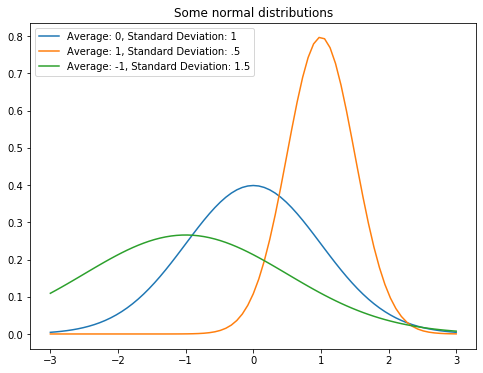

In [393]:
xx = np.linspace(-3,3,75)
yy = normal_distribution(0,1,xx)
yy_2 = normal_distribution(1,.5,xx)
yy_3 = normal_distribution(-1,1.5,xx)
plt.figure(figsize=(8,6))
plt.plot(xx,yy,label='Average: 0, Standard Deviation: 1')
plt.plot(xx,yy_2,label='Average: 1, Standard Deviation: .5')
plt.plot(xx,yy_3,label='Average: -1, Standard Deviation: 1.5')
plt.title('Some normal distributions')
plt.legend()

Text(0.5, 1.0, 'Probabilites for a single roll')

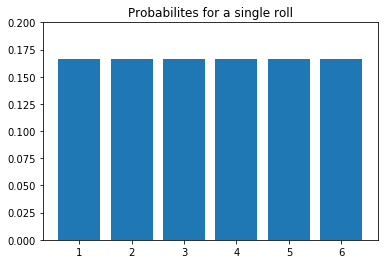

In [301]:
plt.bar(range(1,7),[1/6]*6)
plt.ylim(0,.2)
plt.title('Probabilites for a single roll')

In [327]:
def sample_of_rolls(n_rolls,n_samples):
    sample_averages = []
    for n in range(0,n_samples):
        rolls = np.random.randint(1,7,n_rolls)
        sample_averages.append(sum(rolls)/n_rolls)
    return sample_averages

def sample_of_rolls_bar(n_rolls,n_samples):
    sample_averages = []
    for n in range(0,n_samples):
        rolls = np.random.randint(1,7,n_rolls)
        sample_averages.append(sum(rolls)/n_rolls)
    bar_values = []
    bar_heights = []
    for value in set(sample_averages):
        bar_values.append(value)
        bar_heights.append(sample_averages.count(value))
    return bar_values, bar_heights

In [328]:
sample_of_rolls_bar(1,10)

([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], [3, 2, 1, 1, 1, 2])

Text(0.5, 1.0, 'Results of 250 rolls')

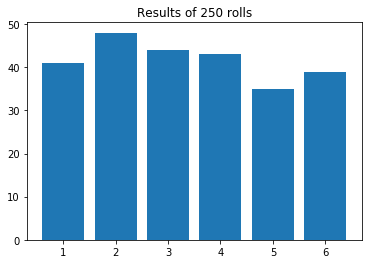

In [332]:
bar_values, bar_heights = sample_of_rolls_bar(1,250)
plt.bar(bar_values,bar_heights)
plt.title('Results of 250 rolls')

Text(0.5, 1.0, 'Results of 250 trials - 5 dice at a time')

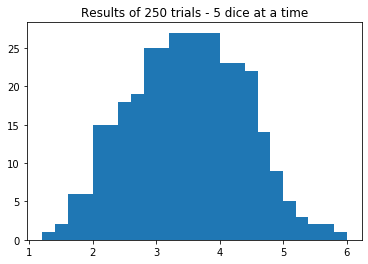

In [334]:
bar_values, bar_heights = sample_of_rolls_bar(5,250)
plt.bar(bar_values,bar_heights)
plt.title('Results of 250 trials - 5 dice at a time')

Text(0.5, 1.0, 'Results of 250 trials - 25 dice at a time')

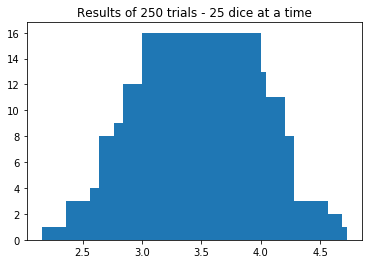

In [339]:
bar_values, bar_heights = sample_of_rolls_bar(25,250)
plt.bar(bar_values,bar_heights)
plt.title('Results of 250 trials - 25 dice at a time')

In [356]:
combined_bar_counts = []
for n in range(0,len(bar_values)):
    combined_bar_counts +=[bar_values[n]]*bar_heights[n]

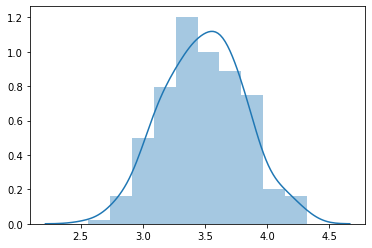

In [359]:
sns.distplot(combined_bar_counts,bins=10)

In [363]:
np.random.choice(range(1,7), 10, p=[0.1, 0, 0.2, 0.6, 0,.1])

array([3, 1, 4, 6, 3, 4, 4, 1, 4, 3])

Text(0.5, 1.0, 'Probabilites for a single roll of our loaded die')

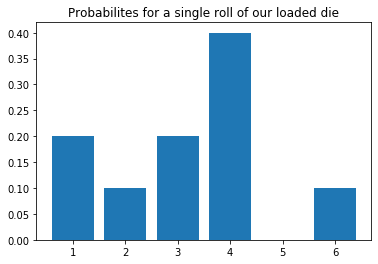

In [366]:
plt.bar(range(1,7),[0.2, .1, 0.2, 0.4, 0,.1])

plt.title('Probabilites for a single roll of our loaded die')

In [372]:
sum(np.array(range(1,7))*[0.2, .1, 0.2, 0.4, 0,.1])

3.2

In [375]:
def loaded_dice_roll(n_rolls,n_samples,probs):
    sample_averages = []
    for n in range(0,n_samples):
        rolls = np.random.choice(range(1,7), n_rolls, p=probs)
        sample_averages.append(sum(rolls)/n_rolls)
    bar_values = []
    bar_heights = []
    for value in set(sample_averages):
        bar_values.append(value)
        bar_heights.append(sample_averages.count(value))
    return bar_values, bar_heights

Text(0.5, 1.0, 'Results of 250 rolls of loaded dice')

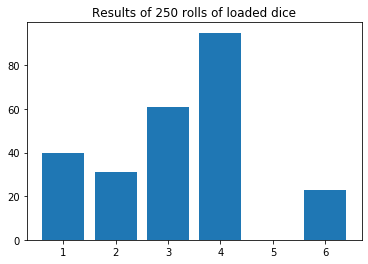

In [376]:
bar_values, bar_heights = loaded_dice_roll(1,250,[0.2, .1, 0.2, 0.4, 0,.1])
plt.bar(bar_values,bar_heights)
plt.title('Results of 250 rolls of loaded dice')

Text(0.5, 1.0, 'Results of 250 trials - 5 loaded dice at a time')

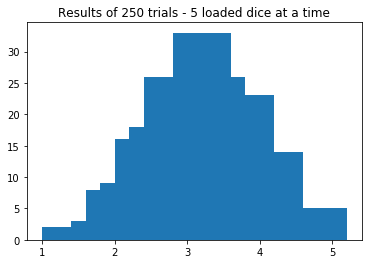

In [377]:
bar_values, bar_heights = loaded_dice_roll(5,250,[0.2, .1, 0.2, 0.4, 0,.1])
plt.bar(bar_values,bar_heights)
plt.title('Results of 250 trials - 5 loaded dice at a time')

Text(0.5, 1.0, 'Results of 250 trials - 25 loaded dice at a time')

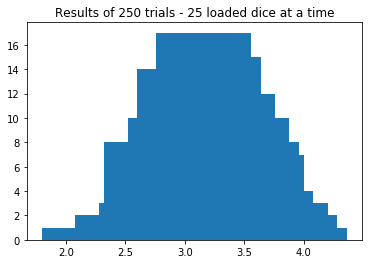

In [378]:
bar_values, bar_heights = loaded_dice_roll(25,250,[0.2, .1, 0.2, 0.4, 0,.1])
plt.bar(bar_values,bar_heights)
plt.title('Results of 250 trials - 25 loaded dice at a time')

In [448]:
def weird_random_variable(n_samples, n_trials):
    sample_averages = []
    for n in range(0,n_samples):
        rolls_loaded = np.random.choice(range(1,7), 3*n_trials, p=[0.2, .1, 0.2, 0.4, 0,.1])
        rolls_fair = np.random.randint(1,7,2*n_trials)
        roll_20 = np.random.randint(1,21,1*n_trials)
        sample_averages.append((sum(rolls_loaded)+sum(rolls_fair)+sum(roll_20))/n_trials*6)
    bar_values = []
    bar_heights = []
    for value in set(sample_averages):
        bar_values.append(value)
        bar_heights.append(sample_averages.count(value))
    return bar_values, bar_heights


# def weird_random_variable(n_samples, n_trials):
#     sample_averages = []
#     for n in range(0,n_trials):
#         rolls = []
#         for i in range(0,n_samples):
#             x = np.random.randint(1,4)
#             if x ==1:
#                 rolls.append(np.random.choice(range(1,7), 1, p=[0.2, .1, 0.2, 0.4, 0,.1])[0])
#             elif x==2:
#                 rolls.append(np.random.randint(1,7))
#             else:
#                 rolls.append(np.random.randint(1,21))
#         sample_averages.append(sum(rolls)/len(rolls))

#     bar_values = []
#     bar_heights = []
#     for value in set(sample_averages):
#         bar_values.append(value)
#         bar_heights.append(sample_averages.count(value))
#     return bar_values, bar_heights
        

<BarContainer object of 202 artists>

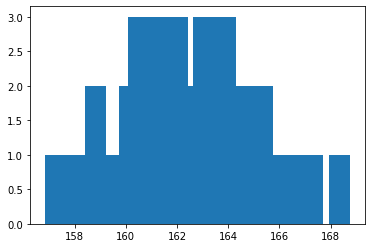

In [455]:
bar_values, bar_heights = weird_random_variable(250,500)
plt.bar(bar_values,bar_heights)

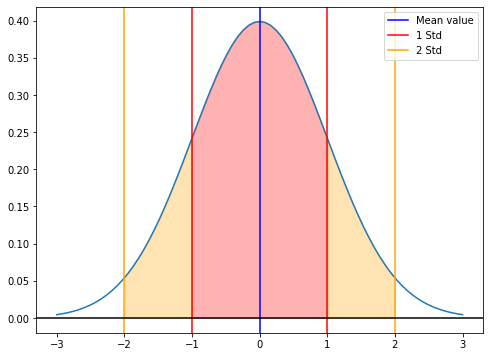

In [480]:
xx = np.linspace(-3,3,75)
yy = normal_distribution(0,1,xx)
shade_1_x = np.linspace(-1,1,75)

shade_2_a = np.linspace(-2,-1,20)
shade_2_b = np.linspace(1,2,20)

plt.figure(figsize=(8,6))
plt.plot(xx,yy)
plt.axvline(0,c='b',label='Mean value')
plt.axvline(1,c='r',label='1 Std')
plt.axvline(-1,c='r')
plt.fill_between(shade_1_x,normal_distribution(0,1,shade_1_x),color='r',alpha=.3)

plt.axvline(2,c='orange',label='2 Std')
plt.axvline(-2,c='orange')
plt.fill_between(shade_2_a,normal_distribution(0,1,shade_2_a),color='orange',alpha=.3)
plt.fill_between(shade_2_b,normal_distribution(0,1,shade_2_b),color='orange',alpha=.3)
plt.axhline(0,c='black')
plt.legend()

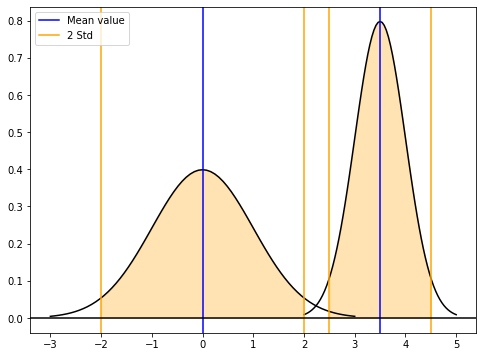

In [488]:
xx = np.linspace(-3,3,75)
xx_2 = np.linspace(2,5,75)
yy = normal_distribution(0,1,xx)
yy_2 = normal_distribution(3.5,.5,xx_2)

shade_1_x = np.linspace(-2,2,75)
shade_2_x = np.linspace(2.5,4.5,75)


plt.figure(figsize=(8,6))
plt.plot(xx,yy,c='black')
plt.plot(xx_2,yy_2,c='k')

plt.axvline(0,c='b',label='Mean value')
plt.axvline(2,c='orange',label='2 Std')
plt.axvline(-2,c='orange')

plt.axvline(3.5,c='b')
plt.axvline(4.5,c='orange')
plt.axvline(2.5,c='orange')

plt.fill_between(shade_1_x,normal_distribution(0,1,shade_1_x),color='orange',alpha=.3)
plt.fill_between(shade_2_x,normal_distribution(3.5,.5,shade_2_x),color='orange',alpha=.3)
plt.axhline(0,c='black')
plt.legend(loc='upper left')

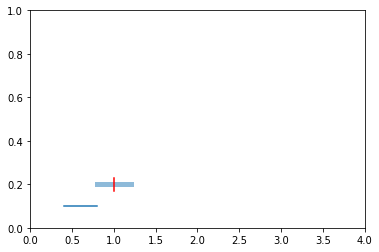

In [544]:
plt.xlim(0,4)
plt.axhline(.1,.1,.2)
plt.axhline(.2,.2,.3,linewidth=5,alpha=.5)
plt.axvline(1,.17,.23,c='r')

In [613]:
def graph_confidence_interval(x,std,y_pos,n_y_steps,xlim):
    xmin = (x - 2*std - xlim[0])/(xlim[1]-xlim[0])
    xmax = (x + 2*std- xlim[0])/(xlim[1]-xlim[0])
    plt.axhline(y_pos,xmin,xmax,linewidth=8,alpha=.5)
    
    mean_top = (y_pos + 3/(2*n_y_steps))/n_y_steps
    mean_bottom = (y_pos - 3/(2*n_y_steps))/n_y_steps
    plt.axvline(x,mean_bottom,mean_top,c='r')


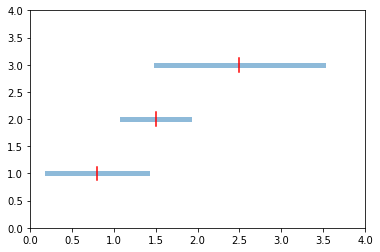

In [563]:
plt.ylim(0,4)
plt.xlim(0,4)
graph_confidence_interval(.8,.3,1,4,(0,4))
graph_confidence_interval(1.5,.2,2,4,(0,4))
graph_confidence_interval(2.5,.5,3,4,(0,4))

In [626]:
def ci_example(trial_range, sample_size, n_trials):
    plt.figure(figsize=(10,8))
    
    
    trials = []
    for n in range(0,n_trials):
        sample = np.random.randint(1,trial_range+1,sample_size)
        trials.append([sum(sample)/sample_size,np.std(sample)/(np.sqrt(sample_size))])
    trials = np.array(trials)
    
    
    xlim = (min(trials[:,0]-2*trials[:,1]),max(trials[:,0]+2*trials[:,1]))
    ylim = (0,n_trials)
    plt.xlim(xlim)
    plt.ylim(ylim)

    for n in range(1,n_trials):
        graph_confidence_interval(trials[n][0],trials[n][1],n,n_trials,xlim)
        
    true_average = sum(range(1,trial_range+1))/trial_range
    plt.axvline(true_average,c='purple')
    plt.ylabel('Trial number')
    plt.xlabel('Sample average and confidence interval')

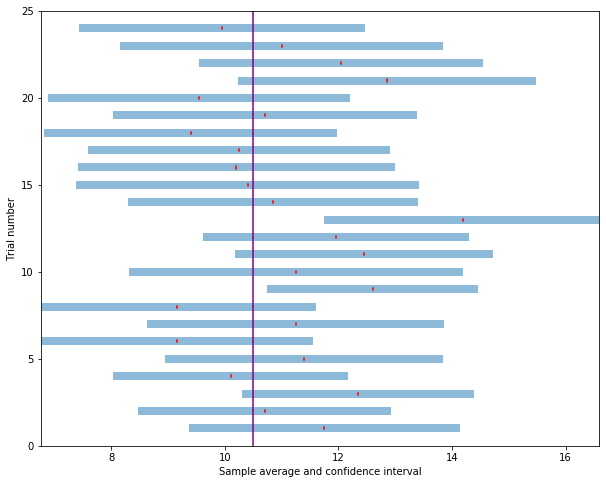

In [627]:
ci_example(20, 20, 25)


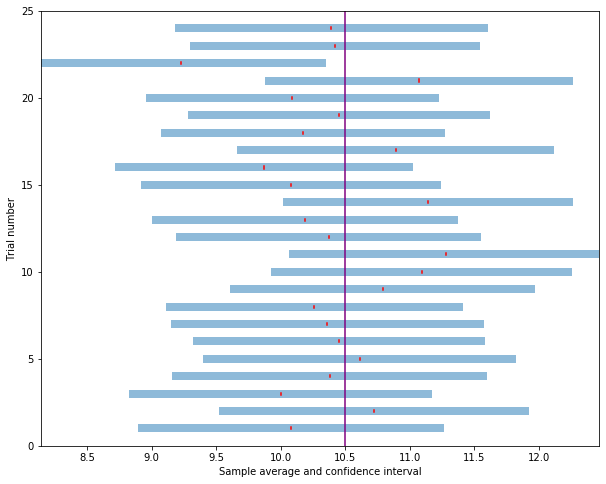

In [639]:
ci_example(20, 100, 25)


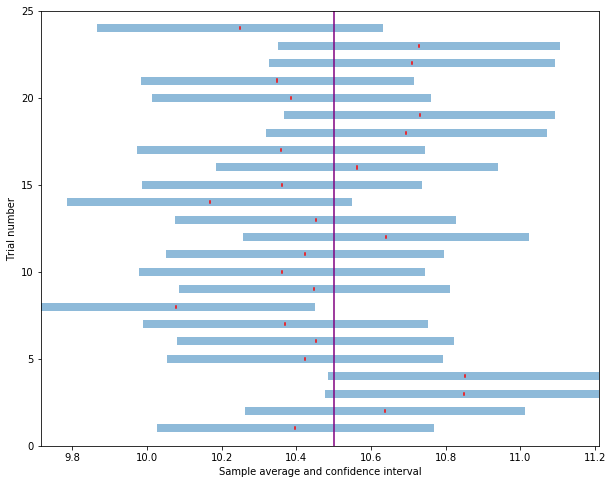

In [641]:
ci_example(20, 1000, 25)

In [604]:
trials

array([[3.2       , 0.50596443],
       [4.3       , 0.61725197],
       [4.3       , 0.54863467],
       [2.6       , 0.45166359],
       [3.3       , 0.54863467],
       [3.2       , 0.57965507],
       [3.9       , 0.47853944],
       [4.        , 0.46904158],
       [3.        , 0.48989795],
       [3.9       , 0.5375872 ]])

In [250]:
def sample_stat():
    x = np.random.randint(1,7)
    return x**2 + x

def alt_stat():
    x=np.random.randint(1,7)
    return 2**x + x

def alt_stat2():
    x=np.random.randint(1,7)
    return np.log(3*x) + x

def alt_stat3():
    x=np.random.randint(1,7)
    return x**np.sqrt(x)


In [231]:
statistics = []
for n in range(0,200):
    temp = []
    for i in range (0,150):
        temp.append(alt_stat3())
    statistics.append(sum(temp)/len(temp))
    


(0.9945624470710754, 0.6848918795585632)

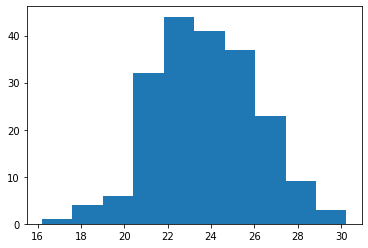

In [232]:
plt.hist(statistics)
stats.shapiro(statistics)

In [214]:
from scipy import stats
stats.shapiro(statistics)

(0.9931269884109497, 0.47702860832214355)